In [2]:
# Import libraries
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Widen jupyter notebook cells
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Show all columns in the head command
pd.set_option('display.max_columns', None)

In [4]:
# Load data from the csv file into a DataFrame and save in a variable
df = pd.read_csv("netflix.csv")

In [5]:
df.head(len(df))

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [6]:
# Informations on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [7]:
# Renaming columns
df.rename(columns={"User ID": "user_id",
                   "Subscription Type": "subs_type",
                   "Monthly Revenue": "monthly_revenue",
                   "Join Date": "join_date",
                   "Last Payment Date": "last_pay_date",
                   "Plan Duration": "plan_duration"}, inplace=True)
df.head()

,user_id,subs_type,monthly_revenue,join_date,last_pay_date,Country,Age,Gender,Device,plan_duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [8]:
# Convert the `date` column to datetime
df['join_date'] = pd.to_datetime(df['join_date'])

In [9]:
# Convert the `date` column to datetime
df['last_pay_date'] = pd.to_datetime(df['last_pay_date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          2500 non-null   int64         
 1   subs_type        2500 non-null   object        
 2   monthly_revenue  2500 non-null   int64         
 3   join_date        2500 non-null   datetime64[ns]
 4   last_pay_date    2500 non-null   datetime64[ns]
 5   Country          2500 non-null   object        
 6   Age              2500 non-null   int64         
 7   Gender           2500 non-null   object        
 8   Device           2500 non-null   object        
 9   plan_duration    2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


In [11]:
df['plan_duration']

0       1 Month
1       1 Month
2       1 Month
3       1 Month
4       1 Month
         ...   
2495    1 Month
2496    1 Month
2497    1 Month
2498    1 Month
2499    1 Month
Name: plan_duration, Length: 2500, dtype: object

In [12]:
# Column 'Plan Duration' has the same value for every row, hence, it is irrelevant for this analysis and will be removed from dataset.

df = df[['user_id', 'subs_type', 'monthly_revenue', 'join_date', 'last_pay_date', 'Country', 'Age', 'Gender', 'Device']].copy()
df.head()

,user_id,subs_type,monthly_revenue,join_date,last_pay_date,Country,Age,Gender,Device
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone


In [13]:
# Analyzing the types of subscriptions

df['subs_type'].value_counts()

Basic       999
Standard    768
Premium     733
Name: subs_type, dtype: int64

In [14]:
df['subs_type'].value_counts(normalize=True)

Basic       0.3996
Standard    0.3072
Premium     0.2932
Name: subs_type, dtype: float64

Text(0, 0.5, '')

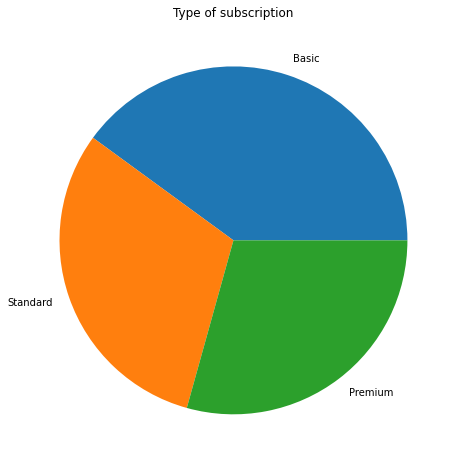

In [15]:
plt.figure(figsize=(12,8));

services = df['subs_type'].value_counts(normalize=True)
services.plot(kind='pie')

plt.title('Type of subscription')
plt.ylabel("")


In [ ]:
# Evaluating Age

In [30]:
df['Age'].unique()

array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
       43, 44, 45, 46, 47, 48, 49, 50, 51], dtype=int64)

In [28]:
df.sort_values(by=['Age'], ascending=True, inplace=True)
df.head(len(df))

,user_id,subs_type,monthly_revenue,join_date,last_pay_date,Country,Age,Gender,Device
20,21,Premium,15,2023-10-06,2023-06-22,United States,26,Female,Laptop
2349,2350,Basic,12,2022-07-14,2023-07-13,United States,27,Female,Laptop
1734,1735,Premium,10,2022-08-27,2023-06-07,United States,27,Male,Smartphone
418,419,Standard,11,2022-10-30,2023-06-27,Spain,27,Female,Laptop
1732,1733,Basic,15,2022-08-16,2023-06-07,United States,27,Female,Tablet
...,...,...,...,...,...,...,...,...,...
1579,1580,Basic,15,2022-06-26,2023-08-07,Italy,51,Female,Smart TV
226,227,Premium,12,2022-09-30,2023-06-24,Brazil,51,Female,Smartphone
2366,2367,Basic,12,2022-09-17,2023-10-07,Canada,51,Male,Tablet
613,614,Basic,15,2022-08-14,2023-06-28,Australia,51,Male,Smartphone


In [31]:
df['Age'].value_counts(normalize=True)

39    0.0464
30    0.0464
28    0.0460
31    0.0460
41    0.0456
47    0.0444
37    0.0428
35    0.0420
29    0.0416
40    0.0412
42    0.0408
48    0.0404
36    0.0396
46    0.0396
49    0.0388
43    0.0376
51    0.0372
33    0.0372
32    0.0368
45    0.0356
38    0.0356
34    0.0352
27    0.0348
44    0.0344
50    0.0336
26    0.0004
Name: Age, dtype: float64

Text(0, 0.5, '')

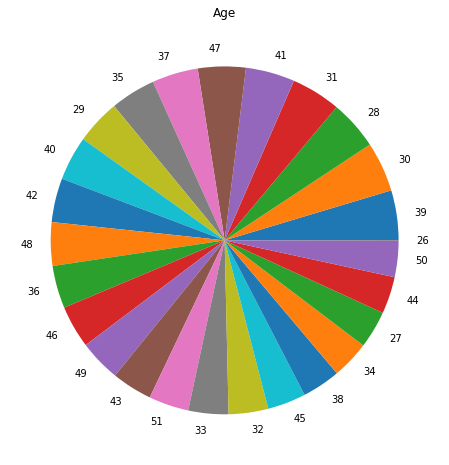

In [32]:
plt.figure(figsize=(12,8));

services = df['Age'].value_counts(normalize=True)
services.plot(kind='pie')

plt.title('Age')
plt.ylabel("")


In [ ]:
# Gender

In [34]:
df['Gender'].value_counts()

Female    1257
Male      1243
Name: Gender, dtype: int64

In [35]:
df['Gender'].value_counts(normalize=True)

Female    0.5028
Male      0.4972
Name: Gender, dtype: float64

Text(0, 0.5, '')

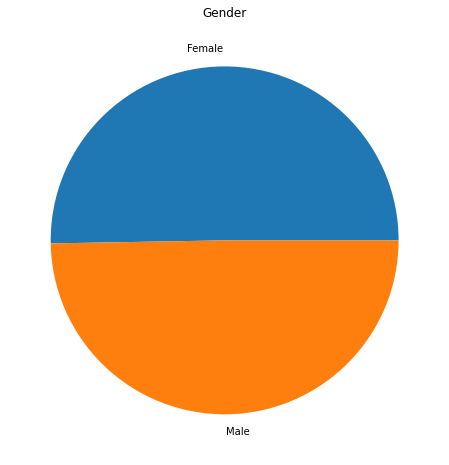

In [36]:
plt.figure(figsize=(12,8));

services = df['Gender'].value_counts(normalize=True)
services.plot(kind='pie')

plt.title('Gender')
plt.ylabel("")

In [ ]:
# Country

In [37]:
df['Country'].value_counts()

United States     451
Spain             451
Canada            317
Mexico            183
France            183
United Kingdom    183
Brazil            183
Australia         183
Italy             183
Germany           183
Name: Country, dtype: int64

In [38]:
df['Country'].value_counts(normalize=True)

United States     0.1804
Spain             0.1804
Canada            0.1268
Mexico            0.0732
France            0.0732
United Kingdom    0.0732
Brazil            0.0732
Australia         0.0732
Italy             0.0732
Germany           0.0732
Name: Country, dtype: float64

Text(0, 0.5, '')

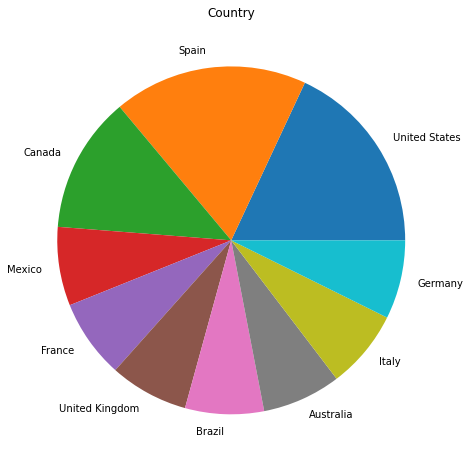

In [39]:
plt.figure(figsize=(12,8));

services = df['Country'].value_counts(normalize=True)
services.plot(kind='pie')

plt.title('Country')
plt.ylabel("")

In [ ]:
# Device

In [40]:
df['Device'].value_counts()

Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: Device, dtype: int64

In [41]:
df['Device'].value_counts(normalize=True)

Laptop        0.2544
Tablet        0.2532
Smartphone    0.2484
Smart TV      0.2440
Name: Device, dtype: float64

Text(0, 0.5, '')

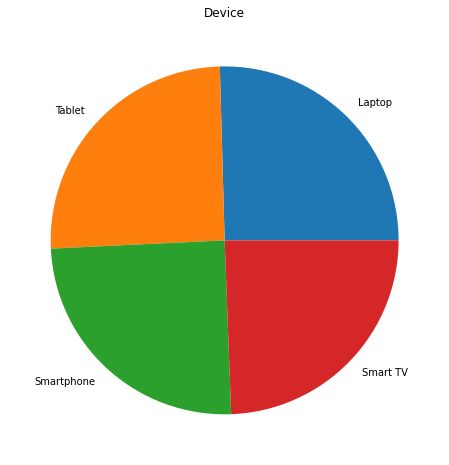

In [43]:
plt.figure(figsize=(12,8));

services = df['Device'].value_counts(normalize=True)
services.plot(kind='pie')

plt.title('Device')
plt.ylabel("")

In [ ]:
# So far this dataset seems to have well distributed values

In [ ]:
# Monthly revenue

# the monthly revenue generated from their subscription


In [44]:
df['monthly_revenue'].value_counts()

12    455
14    431
13    418
10    409
15    399
11    388
Name: monthly_revenue, dtype: int64

In [46]:
df['monthly_revenue'].value_counts(normalize=True)

12    0.1820
14    0.1724
13    0.1672
10    0.1636
15    0.1596
11    0.1552
Name: monthly_revenue, dtype: float64

Text(0, 0.5, '')

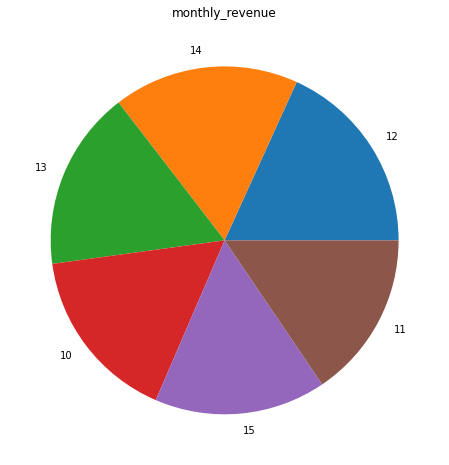

In [45]:
plt.figure(figsize=(12,8));

services = df['monthly_revenue'].value_counts(normalize=True)
services.plot(kind='pie')

plt.title('monthly_revenue')
plt.ylabel("")

In [ ]:
# Period subscribed

In [52]:
df['period'] = df['last_pay_date']-df['join_date']

df.head(len(df))

,user_id,subs_type,monthly_revenue,join_date,last_pay_date,Country,Age,Gender,Device,period
20,21,Premium,15,2023-10-06,2023-06-22,United States,26,Female,Laptop,-106 days
2349,2350,Basic,12,2022-07-14,2023-07-13,United States,27,Female,Laptop,364 days
1734,1735,Premium,10,2022-08-27,2023-06-07,United States,27,Male,Smartphone,284 days
418,419,Standard,11,2022-10-30,2023-06-27,Spain,27,Female,Laptop,240 days
1732,1733,Basic,15,2022-08-16,2023-06-07,United States,27,Female,Tablet,295 days
...,...,...,...,...,...,...,...,...,...,...
1579,1580,Basic,15,2022-06-26,2023-08-07,Italy,51,Female,Smart TV,407 days
226,227,Premium,12,2022-09-30,2023-06-24,Brazil,51,Female,Smartphone,267 days
2366,2367,Basic,12,2022-09-17,2023-10-07,Canada,51,Male,Tablet,385 days
613,614,Basic,15,2022-08-14,2023-06-28,Australia,51,Male,Smartphone,318 days


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 20 to 1085
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   user_id          2500 non-null   int64          
 1   subs_type        2500 non-null   object         
 2   monthly_revenue  2500 non-null   int64          
 3   join_date        2500 non-null   datetime64[ns] 
 4   last_pay_date    2500 non-null   datetime64[ns] 
 5   Country          2500 non-null   object         
 6   Age              2500 non-null   int64          
 7   Gender           2500 non-null   object         
 8   Device           2500 non-null   object         
 9   period           2500 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), int64(3), object(4), timedelta64[ns](1)
memory usage: 214.8+ KB


In [58]:
# Transforming datetime to string

df = df.astype({'period':'str'})
print(df.dtypes)

user_id                     int64
subs_type                  object
monthly_revenue             int64
join_date          datetime64[ns]
last_pay_date      datetime64[ns]
Country                    object
Age                         int64
Gender                     object
Device                     object
period                     object
dtype: object


In [60]:
# Spliting duration column in two new columns, one for the number and other for the measurement unit
df[['period', 'days']] = df['period'].str.split(' ', 1, expand=True)

df.head(len(df))

,user_id,subs_type,monthly_revenue,join_date,last_pay_date,Country,Age,Gender,Device,period,days
20,21,Premium,15,2023-10-06,2023-06-22,United States,26,Female,Laptop,-106,days
2349,2350,Basic,12,2022-07-14,2023-07-13,United States,27,Female,Laptop,364,days
1734,1735,Premium,10,2022-08-27,2023-06-07,United States,27,Male,Smartphone,284,days
418,419,Standard,11,2022-10-30,2023-06-27,Spain,27,Female,Laptop,240,days
1732,1733,Basic,15,2022-08-16,2023-06-07,United States,27,Female,Tablet,295,days
...,...,...,...,...,...,...,...,...,...,...,...
1579,1580,Basic,15,2022-06-26,2023-08-07,Italy,51,Female,Smart TV,407,days
226,227,Premium,12,2022-09-30,2023-06-24,Brazil,51,Female,Smartphone,267,days
2366,2367,Basic,12,2022-09-17,2023-10-07,Canada,51,Male,Tablet,385,days
613,614,Basic,15,2022-08-14,2023-06-28,Australia,51,Male,Smartphone,318,days


In [61]:
# Transforming object to int64

df = df.astype({'period':'int64'})
print(df.dtypes)

user_id                     int64
subs_type                  object
monthly_revenue             int64
join_date          datetime64[ns]
last_pay_date      datetime64[ns]
Country                    object
Age                         int64
Gender                     object
Device                     object
period                      int64
days                       object
dtype: object


array([[<AxesSubplot:title={'center':'period'}>]], dtype=object)

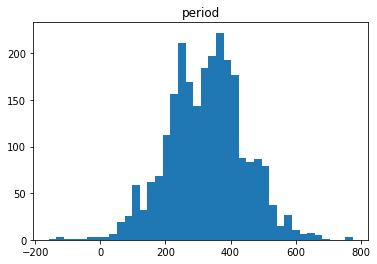

In [62]:
df.hist(['period'], bins=40, grid=False)